In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [80]:
# importando o dataset
df = pd.read_csv('../dataset/data-set-clube-new-v2.csv', sep=';')

In [70]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

In [71]:
# Removendo a coluna id_socio (não usaremos ela por enquanto)
df.drop('id_socio', inplace=True, axis=1)

In [81]:
df.head(1)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,38810,CANCELADO,24,0,0,0


In [7]:
# Separando o dataset por status = ATIVO ou CANCELADO

socio_ativo = (df['status'] == "ATIVO")
socio_ativo = df[socio_ativo]

socio_cancelado = (df['status'] == "CANCELADO")
socio_cancelado = df[socio_cancelado]

Nos próximos blocos analisaremos as 2 variáveis acima em: desvio padrão, máximo e mínimo,
média, correlação e faremos alguns gráficos para melhor análise.

##### 1 - DESVIO PADRÃO

In [8]:
# Desvio padrão ATIVO
socio_ativo.std()

qtde_em_aberto          9.562430
qtde_em_dia             7.601072
qtde_em_atraso          6.239905
qtde_frequencia_ano    47.810617
dtype: float64

In [9]:
# Desvio padrão CANCELADO
socio_cancelado.std()

qtde_em_aberto          8.599585
qtde_em_dia             3.402545
qtde_em_atraso          3.195524
qtde_frequencia_ano    13.317581
dtype: float64

##### 2 - MÁXIMO

In [10]:
# Máximo sócio Ativo
socio_ativo.max()

status                 ATIVO
qtde_em_aberto            55
qtde_em_dia               53
qtde_em_atraso            39
qtde_frequencia_ano      490
dtype: object

In [11]:
# Máximo sócio Cancelado
socio_cancelado.max()

status                 CANCELADO
qtde_em_aberto                48
qtde_em_dia                   24
qtde_em_atraso                24
qtde_frequencia_ano          217
dtype: object

##### 3 - MÍNIMO

In [12]:
# Mínimo sócio Ativo
socio_ativo.min()

status                 ATIVO
qtde_em_aberto             0
qtde_em_dia                0
qtde_em_atraso             0
qtde_frequencia_ano        0
dtype: object

In [13]:
# Mínimo sócio Cancelado
socio_cancelado.min()

status                 CANCELADO
qtde_em_aberto                 0
qtde_em_dia                    0
qtde_em_atraso                 0
qtde_frequencia_ano            0
dtype: object

##### 4 - MÉDIA

In [14]:
# Média sócio Ativo
socio_ativo.mean()

qtde_em_aberto          7.483156
qtde_em_dia             5.438830
qtde_em_atraso          3.946809
qtde_frequencia_ano    21.666667
dtype: float64

In [15]:
# Média sócio Cancelado
socio_cancelado.mean()

qtde_em_aberto         19.725032
qtde_em_dia             1.308690
qtde_em_atraso          1.064851
qtde_frequencia_ano     2.741894
dtype: float64

##### 5 - CORRELAÇÃO

In [16]:
# identificando a correlação entre as variáveis
# Correlação não implica causalidade

def plot_corr(df, size=6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [17]:
# Visualizando a correlação em tabela
# Coeficiente de correlação:
   
    # +1 = forte correlação positiva
    # 0 = não há correlação
    # -1 forte correlação negativa
df.corr()

,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
qtde_em_aberto,1.000000,-0.377307,-0.222397,-0.135453
qtde_em_dia,-0.377307,1.000000,0.221493,0.402164
qtde_em_atraso,-0.222397,0.221493,1.000000,0.236802
qtde_frequencia_ano,-0.135453,0.402164,0.236802,1.000000


Acima podemos ver que a melhor correlação (tendo como base 1 como "forte correlação POSITIVA") está entre as variáveis: 
- qtde_em_dia/qtde_frequencia_ano:  0.402164
- qtde_frequencia_ano/qtde_em_atraso:  0.236802

Podemos ver também que a pior correlação (tendo como base -1 como "forte correlação NEGATIVA") está entre as variáveis:

- qtde_em_dia/qtde_em_aberto:  -0.377307
- qtde_em_atraso/qtde_em_aberto:  -0.222397

#### 6- Gráficos 

#### 6.1 - Pizza

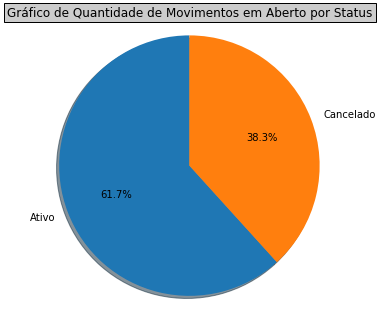

Ativos: 1222
Cancelados: 758


In [30]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Gráfico de Quantidade de Movimentos em Aberto por Status', bbox={'facecolor':'0.8', 'pad':3})

qtde_em_aberto_ativo = (df['status'] == 'ATIVO') & (df['qtde_em_aberto'] > 0)
qtde_em_aberto_ativo = df[qtde_em_aberto_ativo]

qtde_em_aberto_cancelado = (df['status'] == 'CANCELADO') & (df['qtde_em_aberto'] > 0)
qtde_em_aberto_cancelado = df[qtde_em_aberto_cancelado]

labels = ['Ativo', 'Cancelado']
quantidade_qtde_em_aberto = [qtde_em_aberto_ativo.shape[0], qtde_em_aberto_cancelado.shape[0]]

explode = (0, 0)
total = sum(quantidade_qtde_em_aberto)
plt.pie(quantidade_qtde_em_aberto, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

print('Ativos: %s' % (qtde_em_aberto_ativo.shape[0]))
print('Cancelados: %s' % (qtde_em_aberto_cancelado.shape[0]))

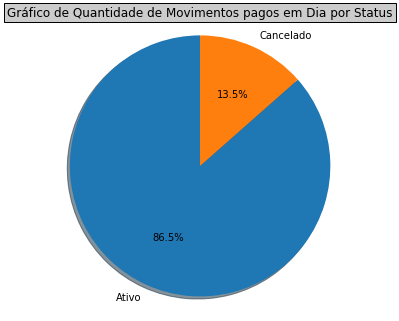

Ativos: 1300
Cancelados: 203


In [32]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Gráfico de Quantidade de Movimentos pagos em Dia por Status', bbox={'facecolor':'0.8', 'pad':3})

qtde_em_dia_ativo = (df['status'] == 'ATIVO') & (df['qtde_em_dia'] > 0)
qtde_em_dia_ativo = df[qtde_em_dia_ativo]

qtde_em_dia_cancelado = (df['status'] == 'CANCELADO') & (df['qtde_em_dia'] > 0)
qtde_em_dia_cancelado = df[qtde_em_dia_cancelado]

labels = ['Ativo', 'Cancelado']
quantidade_qtde_em_dia = [qtde_em_dia_ativo.shape[0], qtde_em_dia_cancelado.shape[0]]

explode = (0, 0)
total = sum(quantidade_qtde_em_dia)
plt.pie(quantidade_qtde_em_dia, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

print('Ativos: %s' % (qtde_em_dia_ativo.shape[0]))
print('Cancelados: %s' % (qtde_em_dia_cancelado.shape[0]))

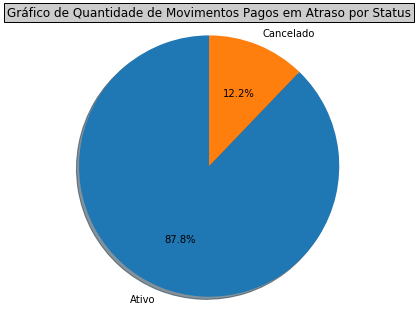

Ativos: 1073
Cancelados: 149


In [35]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Gráfico de Quantidade de Movimentos Pagos em Atraso por Status', bbox={'facecolor':'0.8', 'pad':3})

qtde_em_atraso_ativo = (df['status'] == 'ATIVO') & (df['qtde_em_atraso'] > 0)
qtde_em_atraso_ativo = df[qtde_em_atraso_ativo]

qtde_em_atraso_cancelado = (df['status'] == 'CANCELADO') & (df['qtde_em_atraso'] > 0)
qtde_em_atraso_cancelado = df[qtde_em_atraso_cancelado]

labels = ['Ativo', 'Cancelado']
quantidade_qtde_em_atraso = [qtde_em_atraso_ativo.shape[0], qtde_em_atraso_cancelado.shape[0]]

explode = (0, 0)
total = sum(quantidade_qtde_em_atraso)
plt.pie(quantidade_qtde_em_atraso, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

print('Ativos: %s' % (qtde_em_atraso_ativo.shape[0]))
print('Cancelados: %s' % (qtde_em_atraso_cancelado.shape[0]))

#### 6.2 - Boxplot

In [82]:
# clonando a coluna STATUS para usar o clone como legenda nos gráficos abaixo
df['status_nome'] = df['status']

In [86]:
# Passando a coluna STATUS para o tipo inteiro
label_encoder = preprocessing.LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

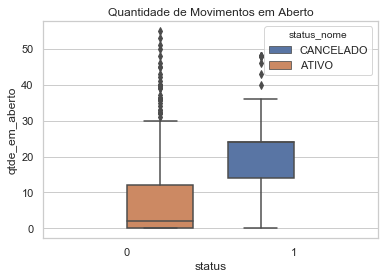

In [95]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="qtde_em_aberto", data=df, hue="status_nome").set_title('Quantidade de Movimentos em Aberto')

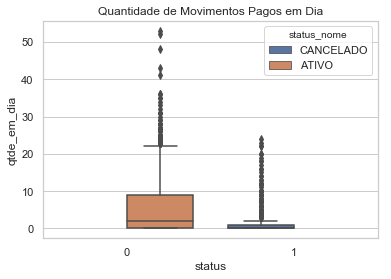

In [96]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="qtde_em_dia", data=df, hue="status_nome").set_title('Quantidade de Movimentos Pagos em Dia')